In [ ]:
import librosa
import os

In [ ]:
audio_path = r'/media/yahya/Users/yahya/ASR/Dataset/train/train_sample_0.wav'


In [ ]:
!pip install tensorflow-io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 14.3 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving train_sample_14540.wav to train_sample_14540.wav


In [ ]:
import tensorflow as tf

# Path to the uploaded file
audio_path = '/content/train_sample_14540.wav'

# Load the audio file
audio = tf.audio.decode_wav(tf.io.read_file(audio_path))

print(audio)


DecodeWav(audio=<tf.Tensor: shape=(117920, 1), dtype=float32, numpy=
array([[ 0.00512695],
       [-0.00866699],
       [-0.02056885],
       ...,
       [-0.01531982],
       [-0.01583862],
       [-0.01483154]], dtype=float32)>, sample_rate=<tf.Tensor: shape=(), dtype=int32, numpy=16000>)


In [ ]:
import tensorflow as tf

# Path to the uploaded file
audio_path = '/content/train_sample_14540.wav'

# Load the audio file
audio_binary = tf.io.read_file(audio_path)
audio, _ = tf.audio.decode_wav(audio_binary)

# Remove the last dimension (1) and squeeze the tensor
audio_tensor = tf.squeeze(audio, axis=-1)

print(audio_tensor)


tf.Tensor(
[ 0.00512695 -0.00866699 -0.02056885 ... -0.01531982 -0.01583862
 -0.01483154], shape=(117920,), dtype=float32)


In [ ]:
import tensorflow as tf
from IPython.display import Audio

# Path to the uploaded file
audio_path = '/content/train_sample_14540.wav'

# Load the audio file
audio_binary = tf.io.read_file(audio_path)
audio, _ = tf.audio.decode_wav(audio_binary)

# Remove the last dimension (1) and squeeze the tensor
audio_tensor = tf.squeeze(audio, axis=-1)

# Get the sample rate
sample_rate = audio.shape[0]  # Get the sample rate directly from the shape

# Display the audio
Audio(audio_tensor.numpy(), rate=sample_rate)


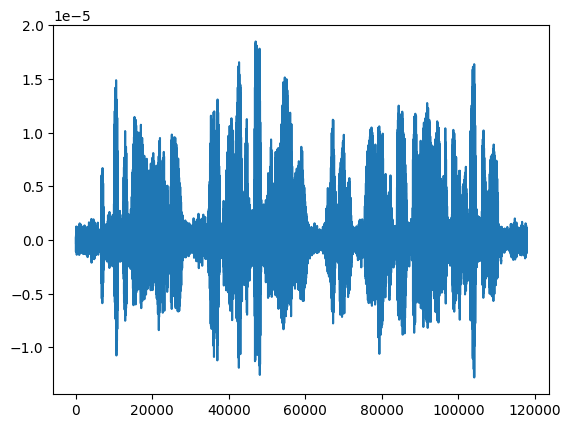

In [ ]:
import matplotlib.pyplot as plt


tensor = tf.cast(audio_tensor, tf.float32) / 32768.0

plt.figure()
plt.plot(tensor.numpy())

tf.Tensor([117920 117920], shape=(2,), dtype=int64)
tf.Tensor(117920, shape=(), dtype=int64) tf.Tensor(117920, shape=(), dtype=int64)


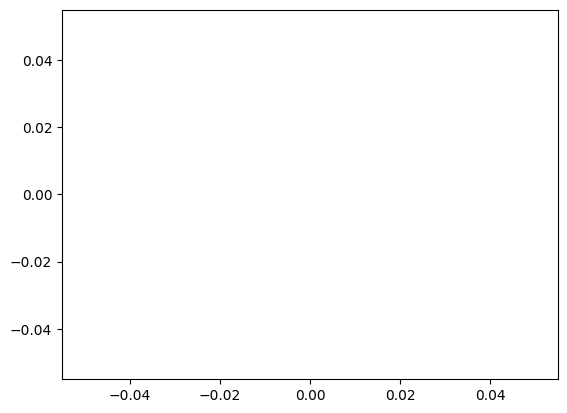

In [ ]:
position = tfio.audio.trim(tensor, axis=0, epsilon=0.1)
print(position)

start = position[0]
stop = position[1]
print(start, stop)

processed = tensor[start:stop]

plt.figure()
plt.plot(processed.numpy())

tf.Tensor([117920 117920], shape=(2,), dtype=int64)
tf.Tensor(117920, shape=(), dtype=int64) tf.Tensor(117920, shape=(), dtype=int64)


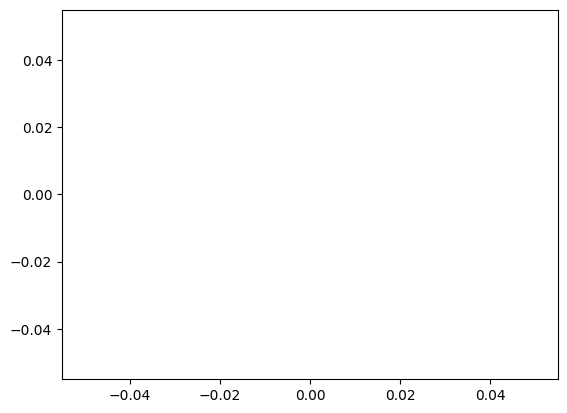

In [ ]:
position = tfio.audio.trim(tensor, axis=0, epsilon=0.1)
print(position)

start = position[0]
stop = position[1]
print(start, stop)

processed = tensor[start:stop]

plt.figure()
plt.plot(processed.numpy())

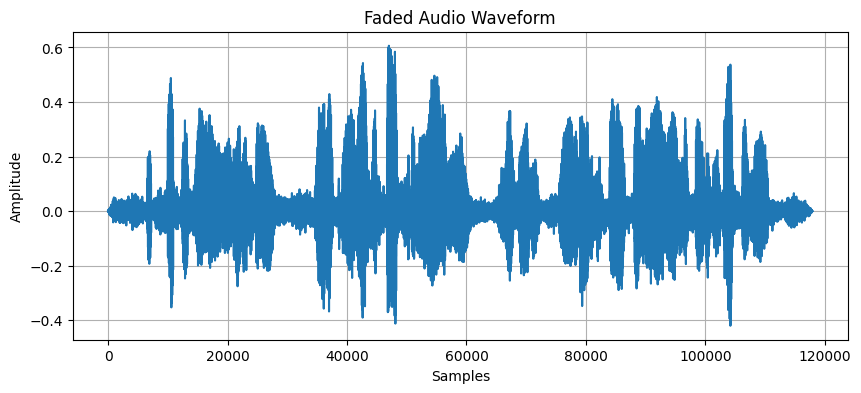

In [ ]:
import tensorflow as tf
import tensorflow_io as tfio
import matplotlib.pyplot as plt

# Path to the uploaded file
audio_path = '/content/train_sample_14540.wav'

# Load the audio file
audio_binary = tf.io.read_file(audio_path)
audio, _ = tf.audio.decode_wav(audio_binary)

# Remove the last dimension (1) and squeeze the tensor
audio_tensor = tf.squeeze(audio, axis=-1)

# Apply fade effect
fade = tfio.audio.fade(audio_tensor, fade_in=1000, fade_out=2000, mode="logarithmic")

# Convert to numpy array
fade_np = fade.numpy()

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(fade_np)
plt.title('Faded Audio Waveform')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


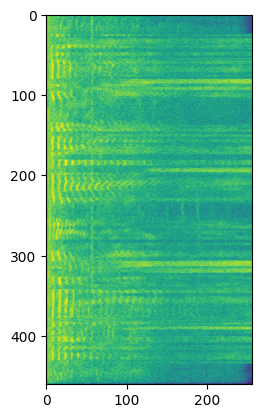

In [ ]:
# Convert to spectrogram
spectrogram = tfio.audio.spectrogram(
    fade, nfft=512, window=512, stride=256)

plt.figure()
plt.imshow(tf.math.log(spectrogram).numpy())

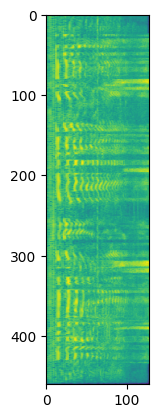

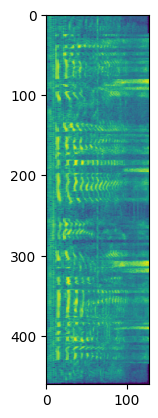

In [ ]:
# Convert to mel-spectrogram
mel_spectrogram = tfio.audio.melscale(
    spectrogram, rate=16000, mels=128, fmin=0, fmax=8000)


plt.figure()
plt.imshow(tf.math.log(mel_spectrogram).numpy())

# Convert to db scale mel-spectrogram
dbscale_mel_spectrogram = tfio.audio.dbscale(
    mel_spectrogram, top_db=80)

plt.figure()
plt.imshow(dbscale_mel_spectrogram.numpy())

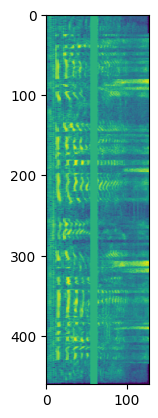

In [ ]:
# Freq masking
freq_mask = tfio.audio.freq_mask(dbscale_mel_spectrogram, param=10)

plt.figure()
plt.imshow(freq_mask.numpy())

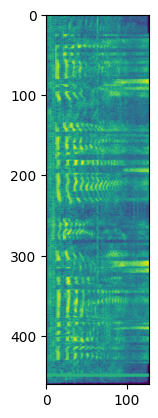

In [ ]:
# Time masking
time_mask = tfio.audio.time_mask(dbscale_mel_spectrogram, param=10)

plt.figure()
plt.imshow(time_mask.numpy())

In [1]:
import librosa

# Path to your audio file
audio_file_path = '/content/train_sample_14555.wav'

# Load the audio file
y, sr = librosa.load(audio_file_path, sr=None)

# Check the sampling rate
if sr == 16000:
    print("The audio sample is at a 16000 Hz sampling rate.")
else:
    print(f"The audio sample is at a {sr} Hz sampling rate.")


The audio sample is at a 16000 Hz sampling rate.


***prepare for training***
6/5/2024

In [2]:
import librosa

def load_audio(clips_path , target_sr=16000):

     y , sr = librosa.load(clips_path  , sr =arget_sr)

     return y , sr

In [5]:
!pip install noisereduce

In [7]:
import noisereduce as nr

def reduce_noise(y , sr ):

    reduced_noise = nr.reduce_noise(y=y , sr=sr)

    return reduced_noise

In [8]:
!pip install webrtcvad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 927.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp310-cp310-linux_x86_64.whl size=73470 sha256=b032c1119d9c08471115404e9a6ca8b0940817491983c97209996b8c30502adf
  Stored in directory: /root/.cache/pip/wheels/2a/2b/84/ac7bacfe8c68a87c1ee3dd3c66818a54c71599abf308e8eb35
Successfully built webrtcvad


In [10]:
import webrtcvad
import numpy as np

def apply_vad(y, sr) :
  vad = webrtcvad.Vad()

  vad.set_mode(3)
  frame_length = 30
  frames= []

  for start in np.arange(0, len(y), int(sr * frame_length / 1000)):
      stop = min(start + int(sr * frame_length / 1000), len(y))
      if vad.is_speech(y[start:stop].tobytes(), sr):
          frames.append(y[start:stop])
  return np.concatenate(frames)

In [11]:
def compute_melspectrogram(y, sr, n_fft=2048, hop_length=512, n_mels=128):
    spectrogram = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels=n_mels
    )
    log_mel_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    return log_mel_spectrogram

In [12]:

def preprocess_audio(audio_path):

    y, sr = load_audio(audio_path)

    y = reduce_noise(y, sr)

    y = apply_vad(y, sr)

    mel_spectrogram = compute_melspectrogram(y, sr)

    return mel_spectrogram


In [ ]:
# Example usage
audio_path = 'path/to/your/audio.wav'
preprocessed_audio = preprocess_audio(audio_path)
print(preprocessed_audio.shape)  # Check shape


In [1]:
import os
import pandas as pd
import librosa
import numpy as np
import noisereduce as nr
import webrtcvad

# Load train.csv
csv_path = 'Dataset/train.csv'
df = pd.read_csv(csv_path, header=None, names=['file', 'transcription'])

# Path to audio files
audio_dir = 'Dataset/train'

In [2]:
def preprocess_audio(file_path):
    # Load audio
    audio_path = os.path.join(audio_dir, file_path + '.wav')
    y, sr = librosa.load(audio_path, sr=16000)

    # Reduce noise
    y = nr.reduce_noise(y=y, sr=sr)

    # Apply VAD
    y = apply_vad(y, sr)

    # Compute Mel spectrogram
    mel_spectrogram = compute_melspectrogram(y, sr)

    return mel_spectrogram

In [3]:
def apply_vad(y, sr):
    vad = webrtcvad.Vad()
    vad.set_mode(3)  # Aggressive mode
    frame_length = 30  # ms
    frames = []
    for start in np.arange(0, len(y), int(sr * frame_length / 1000)):
        stop = min(start + int(sr * frame_length / 1000), len(y))
        if vad.is_speech(y[start:stop].tobytes(), sr):
            frames.append(y[start:stop])
    return np.concatenate(frames)

In [4]:
def compute_melspectrogram(y, sr, n_fft=2048, hop_length=512, n_mels=128):
    spectrogram = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels=n_mels
    )
    log_mel_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    return log_mel_spectrogram

In [6]:
# Preprocess all audio files
for index, row in df.iterrows():
    audio_file = row['file']
    mel_spectrogram = preprocess_audio(audio_file)

    # Save features and transcription to a file or a data structure
    np.save(f'path/to/save/{audio_file}.npy', mel_spectrogram)

    # Print progress
    if (index + 1) % 1000 == 0:
        print(f'Processed {index + 1} files out of {len(df)}')

print('Preprocessing completed.')

/tmp/ipykernel_59445/73126134.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=16000)


FileNotFoundError: [Errno 2] No such file or directory: 'Dataset/train/audio.wav'

In [8]:
import os
import pandas as pd
import librosa
import numpy as np
import noisereduce as nr
import webrtcvad

# Load train.csv
csv_path = 'Dataset/train.csv'
df = pd.read_csv(csv_path)

# Path to audio files
audio_dir = 'Dataset/train'

# Create a directory to save processed data
save_dir = 'processed_data'
os.makedirs(save_dir, exist_ok=True)

def preprocess_audio(file_path):
    # Load audio
    audio_path = os.path.join(audio_dir, file_path + '.wav')
    try:
        y, sr = librosa.load(audio_path, sr=16000)
    except Exception as e:
        print(f'Error loading {audio_path}: {str(e)}')
        return None

    # Reduce noise
    y = nr.reduce_noise(y=y, sr=sr)

    # Apply VAD
    y = apply_vad(y, sr)

    # Compute Mel spectrogram
    mel_spectrogram = compute_melspectrogram(y, sr)

    return mel_spectrogram

def apply_vad(y, sr):
    # Implement VAD (if needed)
    # Placeholder function, you can implement this using WebRTC VAD or another library
    return y

def compute_melspectrogram(y, sr):
    # Compute Mel spectrogram using librosa
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    return mel_spectrogram

# Preprocess all audio files
for index, row in df.iterrows():
    audio_file = row['audio']
    mel_spectrogram = preprocess_audio(audio_file)

    if mel_spectrogram is None:
        continue

    # Save features and transcription to a file or a data structure
    np.save(os.path.join(save_dir, f'{audio_file}.npy'), mel_spectrogram)

    # Print progress
    if (index + 1) % 1000 == 0:
        print(f'Processed {index + 1} files out of {len(df)}')

print('Preprocessing completed.')


Processed 1000 files out of 50715
Processed 2000 files out of 50715
Processed 3000 files out of 50715
Processed 4000 files out of 50715
Processed 5000 files out of 50715
Processed 6000 files out of 50715
Processed 7000 files out of 50715
Processed 8000 files out of 50715
Processed 9000 files out of 50715
Processed 10000 files out of 50715
Processed 11000 files out of 50715


KeyboardInterrupt: 